<a href="https://colab.research.google.com/github/sisomimoctrl/asset-allocation/blob/main/all_weather_ray_dalio_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bt yfinance quantstats

In [2]:
import bt
import yfinance as yf
import pandas as pd
import quantstats as qs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
tickers = ['spy', 'ief', 'tlt', 'gld', 'dbc']
df = yf.download(tickers, end='2022-4-30')['Adj Close']

df.info()

[*********************100%***********************]  5 of 5 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7367 entries, 1993-01-29 to 2022-04-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DBC     4087 non-null   float64
 1   GLD     4392 non-null   float64
 2   IEF     4974 non-null   float64
 3   SPY     7367 non-null   float64
 4   TLT     4974 non-null   float64
dtypes: float64(5)
memory usage: 345.3 KB


In [4]:
for c in df.columns:
    print(c, df[c].first_valid_index(), ',', df[c].last_valid_index())

DBC 2006-02-06 00:00:00 , 2022-04-29 00:00:00
GLD 2004-11-18 00:00:00 , 2022-04-29 00:00:00
IEF 2002-07-30 00:00:00 , 2022-04-29 00:00:00
SPY 1993-01-29 00:00:00 , 2022-04-29 00:00:00
TLT 2002-07-30 00:00:00 , 2022-04-29 00:00:00


In [5]:
start = '2007-1-1'
end = '2022-4-30'

data = df[start:].copy()

In [6]:
print(data.corr())
print(data.resample('M').last().corr())

          DBC       GLD       IEF       SPY       TLT
DBC  1.000000 -0.139647 -0.660146 -0.519423 -0.684015
GLD -0.139647  1.000000  0.741807  0.561228  0.684978
IEF -0.660146  0.741807  1.000000  0.838390  0.981958
SPY -0.519423  0.561228  0.838390  1.000000  0.869100
TLT -0.684015  0.684978  0.981958  0.869100  1.000000
          DBC       GLD       IEF       SPY       TLT
DBC  1.000000 -0.138064 -0.666834 -0.519527 -0.688930
GLD -0.138064  1.000000  0.736096  0.559014  0.680854
IEF -0.666834  0.736096  1.000000  0.838361  0.982397
SPY -0.519527  0.559014  0.838361  1.000000  0.868699
TLT -0.688930  0.680854  0.982397  0.868699  1.000000


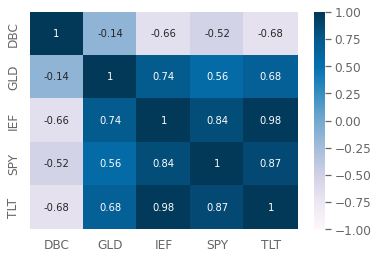

In [7]:
sns.heatmap(data=data.corr(), annot=True, vmin=-1, vmax=1, cmap=plt.cm.PuBu)

In [8]:
def long_only_ew(name, data, tickers, initial_capital=100000000.0):
    s = bt.Strategy(
        name, 
        [bt.algos.RunOnce(),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighEqually(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t 

def strategy_all_weather(name, data, tickers, weights, initial_capital=100000000.0):
    s = bt.Strategy(        
        name, 
        [bt.algos.RunYearly(
            run_on_first_date=True, 
            run_on_end_of_period=True, 
            run_on_last_date=False),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighSpecified(**weights),
         bt.algos.PrintDate(),
         bt.algos.PrintTempData(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t

weights = { 'SPY':0.3, 'IEF':0.15, 'TLT':0.4, 'GLD':0.075, 'DBC':0.075 }
bt_spy = long_only_ew('SPY', data, ['SPY'])
bt_all_weather = strategy_all_weather('All-weather', data, ['SPY', 'IEF', 'TLT','GLD','DBC'], weights=weights)

res = bt.run(bt_all_weather, bt_spy)

2007-01-03 00:00:00
{'selected': ['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], 'weights': {'SPY': 0.3, 'IEF': 0.15, 'TLT': 0.4, 'GLD': 0.075, 'DBC': 0.075}}
2007-12-31 00:00:00
{'selected': ['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], 'weights': {'SPY': 0.3, 'IEF': 0.15, 'TLT': 0.4, 'GLD': 0.075, 'DBC': 0.075}}
2008-12-31 00:00:00
{'selected': ['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], 'weights': {'SPY': 0.3, 'IEF': 0.15, 'TLT': 0.4, 'GLD': 0.075, 'DBC': 0.075}}
2009-12-31 00:00:00
{'selected': ['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], 'weights': {'SPY': 0.3, 'IEF': 0.15, 'TLT': 0.4, 'GLD': 0.075, 'DBC': 0.075}}
2010-12-31 00:00:00
{'selected': ['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], 'weights': {'SPY': 0.3, 'IEF': 0.15, 'TLT': 0.4, 'GLD': 0.075, 'DBC': 0.075}}
2011-12-30 00:00:00
{'selected': ['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], 'weights': {'SPY': 0.3, 'IEF': 0.15, 'TLT': 0.4, 'GLD': 0.075, 'DBC': 0.075}}
2012-12-31 00:00:00
{'selected': ['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], 'weights': {'SPY': 0.3, 'IEF': 0.15, 'TLT'

In [9]:
res.display()

Stat                 All-weather    SPY
-------------------  -------------  ----------
Start                2007-01-02     2007-01-02
End                  2022-04-29     2022-04-29
Risk-free rate       0.00%          0.00%

Total Return         184.22%        293.31%
Daily Sharpe         0.94           0.54
Daily Sortino        1.52           0.84
CAGR                 7.06%          9.35%
Max Drawdown         -14.28%        -55.19%
Calmar Ratio         0.49           0.17

MTD                  -6.38%         -8.78%
3m                   -7.24%         -6.49%
6m                   -9.00%         -9.69%
YTD                  -10.37%        -12.99%
1Y                   -1.74%         -0.63%
3Y (ann.)            7.64%          13.77%
5Y (ann.)            7.01%          13.52%
10Y (ann.)           5.93%          13.55%
Since Incep. (ann.)  7.06%          9.35%

Daily Sharpe         0.94           0.54
Daily Sortino        1.52           0.84
Daily Mean (ann.)    7.11%          11.00%
Daily Vol

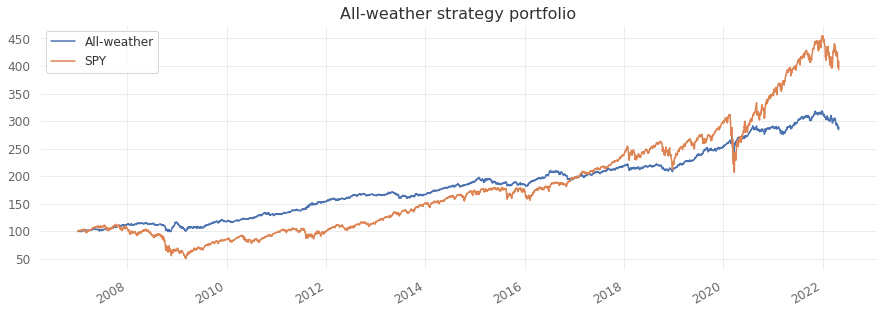

In [10]:
res.plot()
plt.title('All-weather strategy portfolio', fontsize=16)
plt.legend(ncol=1)
plt.show()

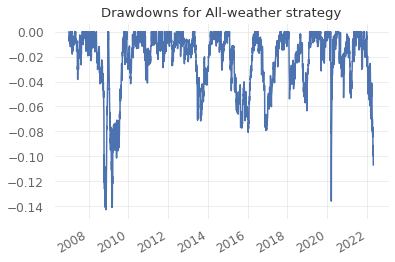

In [11]:
res.backtests['All-weather'].stats.drawdown[:].plot()
plt.title('Drawdowns for All-weather strategy')
plt.show()

In [12]:
res.backtests['All-weather'].stats.drawdown_details.sort_values(by='drawdown', ascending=True).head(5)

,Start,End,Length,drawdown
26,2008-05-21 00:00:00,2008-12-18 00:00:00,211,-0.14282
28,2008-12-31 00:00:00,2009-10-07 00:00:00,280,-0.141016
171,2020-03-09 00:00:00,2020-06-10 00:00:00,93,-0.135967
192,2021-12-28 00:00:00,2022-04-29 00:00:00,122,-0.107084
123,2015-02-03 00:00:00,2016-05-11 00:00:00,463,-0.080797


In [13]:
res.backtests['All-weather'].stats.drawdown_details.sort_values(by='Length', ascending=False).head(5)

,Start,End,Length,drawdown
123,2015-02-03 00:00:00,2016-05-11 00:00:00,463,-0.080797
129,2016-07-11 00:00:00,2017-08-23 00:00:00,408,-0.079188
143,2018-01-29 00:00:00,2019-02-15 00:00:00,382,-0.063491
94,2013-05-03 00:00:00,2014-02-18 00:00:00,291,-0.071625
28,2008-12-31 00:00:00,2009-10-07 00:00:00,280,-0.141016


In [14]:
res.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2007   0.09   1.62  -0.39   1.99  -0.27  -1.01   0.94   1.36   2.81   2.54   1.25   0.57   12.04
  2008   0.56   0.57   0.23   0.05  -0.23   0.16  -1.42   0.36  -2.53  -8.37   6.46   8.27    3.21
  2009  -8.19  -4.23   4.57  -0.55   2.31  -0.55   3.17   1.81   2.71  -0.73   4.38  -2.68    1.21
  2010  -0.34   1.35   0.74   2.75  -0.47   1.5    1.51   3.07   2.08  -0.28  -0.68   0.8    12.61
  2011  -0.75   2.44   0.32   3.11   0.76  -2.02   2.58   3.91   2.02   1.58   0.97   1.07   17.04
  2012   2.52   0.32  -1.05   1.79   0.52   0.79   2.56   0.98   0.07  -1.34   0.88  -1.08    7.07
  2013   0.22   0.31   1.2    1.84  -2.86  -2.95   1.54  -1.27   1.08   2.29  -0.38  -0.13    0.73
  2014   1.95   2.4    0.21   1.3    1.83   1.07  -0.77   3.36  -2.37   1.67   1.76   0.94   14.05
  2015   3